In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [2]:
def train_SOM(SOM, training_data, epochs = 10, learning_rate = 0.5, radius_sq = 1, lr_decay = 0.1, r_decay = 0.1):
    learning_rate_0 = learning_rate
    radius_sq_0 = radius_sq
    for epoch in range(epochs):
        print(epoch)
        for data in training_data:
            x,y = bestMatchingUnit(SOM, data)
            SOM = update_weights(SOM, data, learning_rate, radius_sq, (x,y))
        learning_rate = learning_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_sq_0 * np.exp(-epoch * r_decay)         
    return SOM

In [3]:
def update_weights(SOM, data, learning_rate, radius_sq, BMU, step = 3):
    x,y = BMU
    
    if radius_sq < 1e-3:
        SOM[x,y] += learning_rate * (data - SOM[x,y])
        return SOM
    
    for i in range(max(0, x - step), min(SOM.shape[0], x + step)):
        for j in range(max(0, y - step), min(SOM.shape[1], y + step)):
            dist_sq = np.square(i - x) + np.square(j - y)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j] += learning_rate * dist_func * (data - SOM[i,j])   
    return SOM    

In [4]:
def bestMatchingUnit(SOM, data):
    # dist = (np.square(SOM - data)).sum(axis=2)
    dist = np.sqrt(np.sum((SOM - data)** 2,axis=2))
    return np.unravel_index(np.argmin(dist), dist.shape)

In [5]:
def visualize_map(SOM, x_test, y_test):
        wmap = {}
        im = 0
        for x, t in zip(x_test, y_test):
            distance = np.sqrt(np.sum((SOM - x) ** 2, axis=2))
            pos = np.unravel_index(np.argmin(distance, axis=None), distance.shape)
            wmap[pos] = im
            plt.text(pos[0],  pos[1],  str(t), color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
            im = im + 1
        plt.axis([0, SOM.shape[0], 0,  SOM.shape[1]])
        plt.show()

In [6]:
def label_neurons(SOM, x_train, y_train):
        # majority vote on reiterating train data and labeling winner node
        labels = np.zeros((SOM.shape[0], SOM.shape[1], 10))
        for idx, feature in enumerate(x_train):
            distance = np.sqrt(np.sum((SOM - feature) ** 2, axis=2))
            pos = np.unravel_index(np.argmin(distance, axis=None), distance.shape)
            labels[pos[0], pos[1], y_train[idx]] += 1
        labels = np.argmax(labels, axis=2)
        return labels

In [7]:
def accuracy(SOM, labels, x_test, y_test):
        t = 0
        for idx, feature in enumerate(x_test):
            distance = np.sqrt(np.sum((SOM - feature) ** 2, axis=2))
            pos = np.unravel_index(np.argmin(distance, axis=None), distance.shape)
            if labels[pos[0], pos[1]] == y_test[idx]:
                t += 1
        return t / len(y_test)

In [8]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [9]:
train_X = train_X/255.0
test_X = test_X/255.0
train_Y = train_Y
test_Y = test_Y

In [10]:
train_X = train_X.reshape(train_X.shape[0], 784).astype(float)
test_X = test_X.reshape(test_X.shape[0], 784).astype(float)

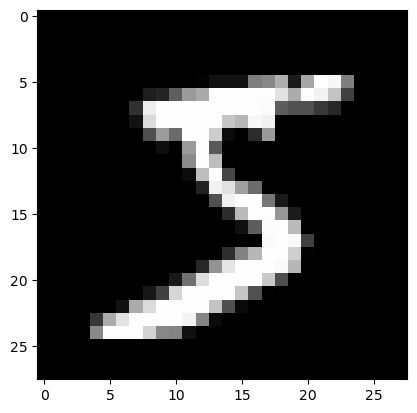

In [11]:
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')

In [12]:
rand = np.random.RandomState(0)

In [13]:
n = train_X.shape[0] #samples
m = train_X.shape[1] #features
dim = (10,10)
SOM = rand.randint(0, 1, (dim[0], dim[1], m)).astype(float)

In [14]:
SOM = train_SOM(SOM, train_X, epochs = 5)

0
1
2
3
4


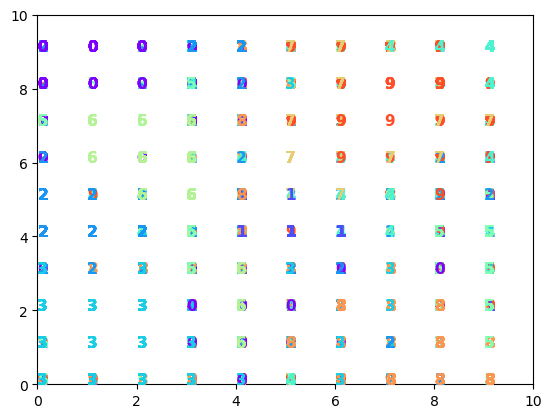

In [15]:
visualize_map(SOM, test_X, test_Y)

In [16]:
#labels = label_neurons(SOM, train_X, train_Y)

In [17]:
#print('accuracy', accuracy(SOM, labels, test_X, test_Y))
#plt.hist(labels.flatten(), bins=10)

In [18]:
#np.unique(train_Y, return_counts=True)